In [1869]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1870]:
df = pd.read_csv('../doge_v1.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,...,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,dogecoin_unscaled,dogecoin_monthly,scale,dogecoin
2017-11-09,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,1.652570e+05,0.633,9.490,...,225.0,395.000000,336.0,732.0,67.0,0.0,57,1.0,0.01,0.57
2017-11-10,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,1.653080e+05,0.833,11.958,...,225.0,395.166667,336.0,732.0,67.0,0.0,24,1.0,0.01,0.24
2017-11-11,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,1.653630e+05,0.980,13.224,...,225.0,395.333333,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-12,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,1.654020e+05,1.102,14.469,...,225.0,395.500000,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-13,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,1.654527e+05,1.277,15.383,...,225.0,395.666667,336.0,732.0,67.0,0.0,41,1.0,0.01,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.139469,0.142264,0.136853,0.141805,0.141805,412307174,2.971374e+06,9.000,487.909,...,874.0,1061.000000,956.0,1065.0,129.0,0.0,23,4.0,0.04,0.92
2022-02-01,2022-02-01,0.141805,0.144129,0.141125,0.142631,0.142631,409432267,2.977053e+06,8.889,500.778,...,872.0,1062.000000,957.0,1065.0,129.0,0.0,93,4.0,0.04,3.72
2022-02-02,2022-02-02,0.142626,0.145253,0.136918,0.137235,0.137235,483194691,2.982243e+06,8.167,514.167,...,872.0,1062.000000,957.0,1065.0,129.0,0.0,87,4.0,0.04,3.48
2022-02-03,2022-02-03,0.137213,0.138747,0.135565,0.137541,0.137541,383506507,2.987430e+06,6.455,404.000,...,872.0,1062.000000,957.0,1065.0,129.0,0.0,82,4.0,0.04,3.28


<AxesSubplot:>

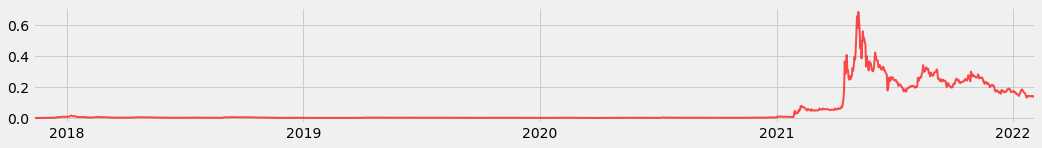

In [1871]:
df = df.resample('D').ffill()
df.Close.plot(figsize=(16, 2), color="red", label='Close price', lw=2, alpha =.7)

In [1872]:
future_days = 1
columnName = str(future_days)+'_day_price_forecast'

In [1873]:
#added new column
df[columnName] = df[['Close']].shift(-future_days)

df[['Close', columnName]]

,Close,1_day_price_forecast
2017-11-09,0.001415,0.001163
2017-11-10,0.001163,0.001201
2017-11-11,0.001201,0.001038
2017-11-12,0.001038,0.001211
2017-11-13,0.001211,0.001184
...,...,...
2022-01-31,0.141805,0.142631
2022-02-01,0.142631,0.137235
2022-02-02,0.137235,0.137541
2022-02-03,0.137541,0.141685


In [1874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Freq: D
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1549 non-null   object 
 1   Open                         1549 non-null   float64
 2   High                         1549 non-null   float64
 3   Low                          1549 non-null   float64
 4   Close                        1549 non-null   float64
 5   Adj Close                    1549 non-null   float64
 6   Volume                       1549 non-null   int64  
 7   twitter_followers            1549 non-null   float64
 8   reddit_average_posts_48h     1549 non-null   float64
 9   reddit_average_comments_48h  1549 non-null   float64
 10  reddit_subscribers           1549 non-null   float64
 11  reddit_accounts_active_48h   1549 non-null   float64
 12  forks                        1549 non-null   float

In [1875]:
X = np.array(df[["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]])


print(df.shape)

X = X[:df.shape[0] - future_days]
print(X)

(1549, 25)
[[1.41500000e-03 1.18100000e-03 6.25955000e+06 ... 0.00000000e+00
  1.00000000e+00 5.70000000e-01]
 [1.43100000e-03 1.12500000e-03 4.24652000e+06 ... 0.00000000e+00
  1.00000000e+00 2.40000000e-01]
 [1.25700000e-03 1.14100000e-03 2.23108000e+06 ... 0.00000000e+00
  1.00000000e+00 2.30000000e-01]
 ...
 [1.44129000e-01 1.41125000e-01 4.09432267e+08 ... 0.00000000e+00
  4.00000000e+00 3.72000000e+00]
 [1.45253000e-01 1.36918000e-01 4.83194691e+08 ... 0.00000000e+00
  4.00000000e+00 3.48000000e+00]
 [1.38747000e-01 1.35565000e-01 3.83506507e+08 ... 0.00000000e+00
  4.00000000e+00 3.28000000e+00]]


In [1876]:
y = np.array(df[columnName])
y = y[:-future_days]
print(y)

[0.001163 0.001201 0.001038 ... 0.137235 0.137541 0.141685]


In [1877]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

In [1878]:
from sklearn.preprocessing import StandardScaler


StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(x_train)
y_p = StdS_y.fit_transform(y_train.reshape(-1,1))

print("Scaled X_l:")
print(X_l)
print("Scaled y_p:")
print(y_p)

Scaled X_l:
[[-0.39367943 -0.41385857 -0.2014769  ... -0.31944861 -0.10595194
  -0.04440799]
 [-0.39238134 -0.41915265 -0.20310446 ... -0.31944861 -0.10595194
  -0.14081802]
 [-0.406498   -0.41764006 -0.20473396 ... -0.31944861 -0.10595194
  -0.14373953]
 ...
 [ 3.93356113  4.48618801  0.16575939 ...  0.57790687  0.65488621
   0.27988029]
 [ 3.92536698  4.50150302  0.22837542 ... -0.31944861  0.65488621
   0.43764216]
 [ 3.98889191  4.55085138  0.38279042 ... -0.31944861  0.65488621
   0.45517125]]
Scaled y_p:
[[-0.41644404]
 [-0.41315149]
 [-0.42727479]
 ...
 [ 4.1661761 ]
 [ 4.15300591]
 [ 4.13195093]]


In [1879]:

StdS_X_test = StandardScaler()
StdS_y_test = StandardScaler()

X_l_test = StdS_X_test.fit_transform(x_test)
y_p_test = StdS_y_test.fit_transform(y_test.reshape(-1,1))

print("Scaled X_l_test:")
print(X_l_test)
print("Scaled y_p_test:")
print(y_p_test)

Scaled X_l_test:
[[-1.85848319 -2.11900651 -0.48809287 ... -0.44664227 -0.47087352
  -0.45317956]
 [-1.71853358 -2.10261672  0.22048017 ... -0.44664227 -0.47087352
  -0.59946706]
 [-1.78887072 -2.05864441 -0.28036058 ... -0.44664227 -0.47087352
  -0.60488512]
 ...
 [-1.05633384 -1.05985672 -0.52157589 ... -0.44664227 -0.55783854
  -0.2906379 ]
 [-1.04627801 -1.11000351 -0.51145202 ... -0.44664227 -0.55783854
  -0.31231012]
 [-1.10448373 -1.12613106 -0.52513419 ... -0.44664227 -0.55783854
  -0.3303703 ]]
Scaled y_p_test:
[[-1.90109281e+00]
 [-1.94558719e+00]
 [-1.96473563e+00]
 [-1.94826386e+00]
 [-1.92466804e+00]
 [-1.87564392e+00]
 [-1.93154500e+00]
 [-1.90646673e+00]
 [-1.90420186e+00]
 [-1.88195467e+00]
 [-1.77072902e+00]
 [-1.81069366e+00]
 [-1.57722685e+00]
 [-1.28822958e+00]
 [-6.63434603e-01]
 [ 1.22735003e+00]
 [ 3.86290962e-01]
 [ 7.60014923e-01]
 [ 1.65405134e+00]
 [ 7.49977436e-01]
 [ 6.20519587e-01]
 [ 1.47388470e-01]
 [ 1.91351203e-02]
 [ 2.42564439e-01]
 [ 4.59223427e-02]

In [1880]:
from sklearn.svm import SVR
svr_sigmoid = SVR(kernel='sigmoid', coef0 = 1.125, tol = 0.02,  C = 0.0185, epsilon=0.0002)
svr_sigmoid.fit(X_l, y_p)

C:\Users\nikol\Desktop\SIAP - projekat\SIAP_2022\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.0185, coef0=1.125, epsilon=0.0002, kernel='sigmoid', tol=0.02)

In [1881]:
from sklearn.linear_model import LinearRegression
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(X_l, y_p)

LinearRegression()

In [1882]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction.
# The best possible score is 1.0
lr_confidence = lr.score(X_l_test, y_p_test)
print("lr confidence: ", lr_confidence)

svr_linear_confidence = svr_sigmoid.score(X_l_test, y_p_test)
print('svr_linear confidence', svr_linear_confidence)

lr confidence:  0.7745555395734195
svr_linear confidence 0.6438168687985772


In [1883]:
svr_prediction = svr_sigmoid.predict(X_l_test)
print(svr_prediction)

[-1.48942217e+00 -1.43466961e+00 -1.46554932e+00 -1.51464133e+00
 -1.52593286e+00 -1.53183305e+00 -1.47567130e+00 -1.46500734e+00
 -1.50404626e+00 -1.49990870e+00 -1.48514601e+00 -1.24303041e+00
 -1.28084218e+00 -1.24434652e+00 -8.85560457e-01 -8.22901637e-01
  2.16212684e-01  3.45639191e-01 -3.65914916e-02  1.89274966e-01
  4.15303558e-01  6.81107415e-02 -8.33342689e-02 -2.81396117e-01
 -3.40561683e-01 -6.95009860e-01 -7.21293329e-01 -7.26766808e-01
 -4.74726921e-01 -5.06388803e-01 -5.23321533e-01 -1.95677415e-01
  2.95243943e-01  3.81945503e-01  1.28680624e+00  1.75734790e+00
  1.72785404e+00  1.66989101e+00  1.83070336e+00  1.92695945e+00
  1.71085296e+00  1.48653467e+00  1.27635054e+00  1.17539213e+00
  1.42851936e+00  1.34841885e+00  1.16618880e+00  1.13452665e+00
  1.09945483e+00  1.03802739e+00  8.07860304e-01  7.69126445e-01
  6.18418721e-01  4.16441759e-01  4.54973420e-01  5.97736348e-01
  5.45917915e-01  4.64823665e-01  4.29264193e-01  3.18452139e-01
  2.55435850e-01  3.84662

In [1884]:
final_prediction =svr_prediction.reshape(-1,1)
final_prediction = StdS_y_test.inverse_transform(final_prediction)
print(final_prediction)

[[0.10197398]
 [0.10729242]
 [0.10429289]
 [0.0995243 ]
 [0.09842749]
 [0.09785437]
 [0.10330969]
 [0.10434554]
 [0.10055346]
 [0.10095537]
 [0.10238935]
 [0.12590746]
 [0.12223458]
 [0.12577962]
 [0.16063061]
 [0.16671703]
 [0.2676523 ]
 [0.28022426]
 [0.24309595]
 [0.26503568]
 [0.28699116]
 [0.25326629]
 [0.23855555]
 [0.21931664]
 [0.21356954]
 [0.17913991]
 [0.17658684]
 [0.17605517]
 [0.20053728]
 [0.19746178]
 [0.195817  ]
 [0.227643  ]
 [0.27532907]
 [0.2837509 ]
 [0.37164533]
 [0.4173518 ]
 [0.41448689]
 [0.4088566 ]
 [0.42447725]
 [0.43382717]
 [0.41283547]
 [0.39104612]
 [0.37062971]
 [0.36082302]
 [0.38541076]
 [0.37763012]
 [0.35992905]
 [0.35685352]
 [0.35344679]
 [0.34747998]
 [0.3251225 ]
 [0.32136006]
 [0.30672093]
 [0.28710172]
 [0.29084453]
 [0.30471193]
 [0.2996785 ]
 [0.29180134]
 [0.28834724]
 [0.27758342]
 [0.27146228]
 [0.28401484]
 [0.29694047]
 [0.31112064]
 [0.31432538]
 [0.30874602]
 [0.30531378]
 [0.29857399]
 [0.29553337]
 [0.28822364]
 [0.28776437]
 [0.28

In [1885]:
print(y_test)

[0.061986 0.057664 0.055804 0.057404 0.059696 0.064458 0.059028 0.061464
 0.061684 0.063845 0.074649 0.070767 0.093445 0.121517 0.182207 0.36587
 0.284173 0.320475 0.407318 0.3195   0.306925 0.260967 0.248509 0.270212
 0.251111 0.270674 0.272188 0.323682 0.305169 0.337561 0.392987 0.376046
 0.441707 0.541334 0.657633 0.580804 0.684777 0.636439 0.57007  0.449964
 0.495231 0.385376 0.490374 0.559604 0.507972 0.514895 0.487892 0.476115
 0.333123 0.400194 0.359382 0.342371 0.308071 0.366162 0.346302 0.353693
 0.332945 0.311205 0.30311  0.302224 0.32581  0.370077 0.423374 0.399963
 0.376323 0.372177 0.371807 0.33105  0.327687 0.343331 0.326351 0.319359
 0.312084 0.324382 0.332085 0.328381 0.307761 0.306496 0.293472 0.287356
 0.2809   0.178691 0.191031 0.232174 0.262782 0.239153 0.244784 0.26445
 0.256857 0.262769 0.254215 0.244549 0.245264 0.246411 0.246483 0.231614
 0.234422 0.224126 0.207597 0.219864 0.21392  0.215856 0.208048 0.200003
 0.197324 0.184888 0.172345 0.186125 0.182233 0.17355

In [1886]:
print(len(final_prediction))
print(len(y_test))

310
310


In [1887]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,...,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,dogecoin_unscaled,dogecoin_monthly,scale,dogecoin,1_day_price_forecast
2017-11-09,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,1.652570e+05,0.633,9.490,...,395.000000,336.0,732.0,67.0,0.0,57,1.0,0.01,0.57,0.001163
2017-11-10,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,1.653080e+05,0.833,11.958,...,395.166667,336.0,732.0,67.0,0.0,24,1.0,0.01,0.24,0.001201
2017-11-11,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,1.653630e+05,0.980,13.224,...,395.333333,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23,0.001038
2017-11-12,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,1.654020e+05,1.102,14.469,...,395.500000,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23,0.001211
2017-11-13,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,1.654527e+05,1.277,15.383,...,395.666667,336.0,732.0,67.0,0.0,41,1.0,0.01,0.41,0.001184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.139469,0.142264,0.136853,0.141805,0.141805,412307174,2.971374e+06,9.000,487.909,...,1061.000000,956.0,1065.0,129.0,0.0,23,4.0,0.04,0.92,0.142631
2022-02-01,2022-02-01,0.141805,0.144129,0.141125,0.142631,0.142631,409432267,2.977053e+06,8.889,500.778,...,1062.000000,957.0,1065.0,129.0,0.0,93,4.0,0.04,3.72,0.137235
2022-02-02,2022-02-02,0.142626,0.145253,0.136918,0.137235,0.137235,483194691,2.982243e+06,8.167,514.167,...,1062.000000,957.0,1065.0,129.0,0.0,87,4.0,0.04,3.48,0.137541
2022-02-03,2022-02-03,0.137213,0.138747,0.135565,0.137541,0.137541,383506507,2.987430e+06,6.455,404.000,...,1062.000000,957.0,1065.0,129.0,0.0,82,4.0,0.04,3.28,0.141685


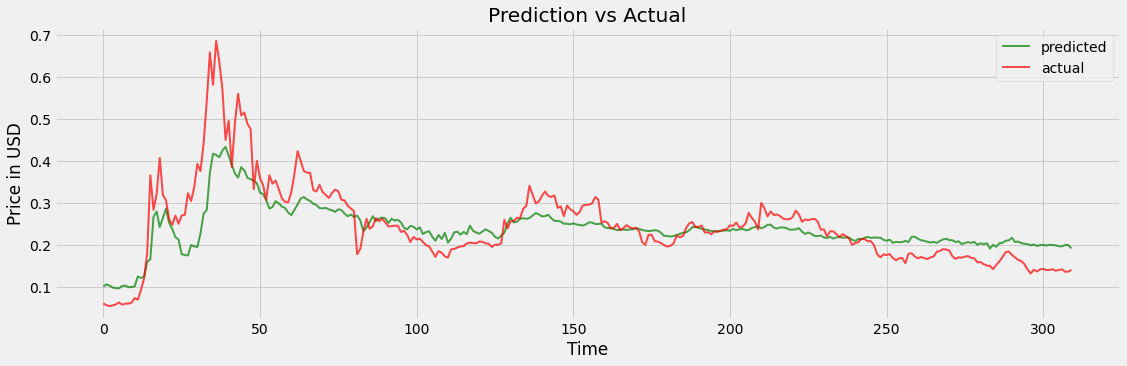

In [1888]:
plt.figure(figsize=(17,5))
plt.plot(final_prediction, label='Prediction', lw=2, alpha =.7, color = "green")
plt.plot(y_test, label='Actual', lw=2, alpha =.7, color = "red")
plt.legend(['predicted', "actual"])
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')

plt.show()

In [1889]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


print("R^2")
print(svr_linear_confidence)

print("\nMAE")
print(mean_absolute_error(y_test,final_prediction))

print("\nRMSE")
print(sqrt(mean_squared_error(y_test, final_prediction)))

R^2
0.6438168687985772

MAE
0.03983480711055959

RMSE
0.05797173291602564
